<center><span style="color:green; font-size:200%;  font-weight: bold">Welcome to Avo World!!</span></center>

### ![Avocadoes](../../Downloads/avocadogif.gif)

### Questions: 
   * ####  Does the average price of avocados correlate with the total volume of avocados sold?
   * ####  How has the popularity of avocados (conventional & organic) changed over time? *** How many conventional avocados were sold vs organic avocados?
   * #### In which cities is it relatively expensive to buy organic avocados?
   * #### How have conventional avocado prices changed in the past few years?
   * #### How does the season affect the average price and the amount of avocados sold in the US? (Not Answered)
    

### Dataset Features (Columns):
   * #### Date - The date of observation 
   * #### Average Price - The average price of one avocado
   * #### Total Volume - Total number of avocados sold
   * #### 4046 - Total number of avocados with PLU 4046 sold 
   * #### 4225 - Total number of avocados with PLU 4225 sold 
   * #### 4770 - Total number of avocados with PLU 4770 sold
   * #### Year - Between 2015-2018
   * #### Region - The region or city of the data observation
   * #### Type - conventional or organic avocados

### Resource: [KaggleAvocadoToast](https://www.kaggle.com/neuromusic/avocado-prices)

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import norm

### Avocado Dataset and Cleaning Dataset


In [34]:
avocados_df = pd.read_csv('../../DS1/datasets/avocado.csv')
avocados_df['Date'] = pd.to_datetime(avocados_df['Date'])
avocados_df['Month'] = avocados_df['Date'].dt.month
avocados_df.rename(columns={'type':'Type', 'year':'Year', 'region':'Region', 'Total Volume':'TotalVolume', 'Total Bags':'TotalBags', 'Small Bags':'SmallBags', 'Large Bags':'LargeBags', 'XLarge Bags': 'XLargeBags'},inplace=True)


In [35]:
avocados_df

,Unnamed: 0,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,Type,Year,Region,Month
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany,12
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany,12
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany,12
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany,12
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany,11
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00,conventional,2015,Albany,11
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00,conventional,2015,Albany,11
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00,conventional,2015,Albany,11
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00,conventional,2015,Albany,11
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.00,conventional,2015,Albany,10


### Helper Functions 

(Write Markdown that has APPEND class that links to this part of the page.) (Give it specific class name to refer to later.)

In [4]:
def _drop_redundant_columns(dataset, col_name=None):
    """ Helper function with KWA to remove redundant/unnecessary columns. """
    if col_name is not None:
        if col_name in dataset.columns:
            dataset.drop(columns=[col_name], inplace=True)
            return dataset.head()
        else:
            raise NameError("\nColumn name not found in dataset.\n")
    else:
        print("\nNo column name given.\n")

In [5]:
_drop_redundant_columns(avocados_df, "Unnamed: 0")

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Type,Year,Region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


### Q1: Does the average price of avocados correlate with the total volume of avocados sold?

#### I guessing that average price correlates with total volume.

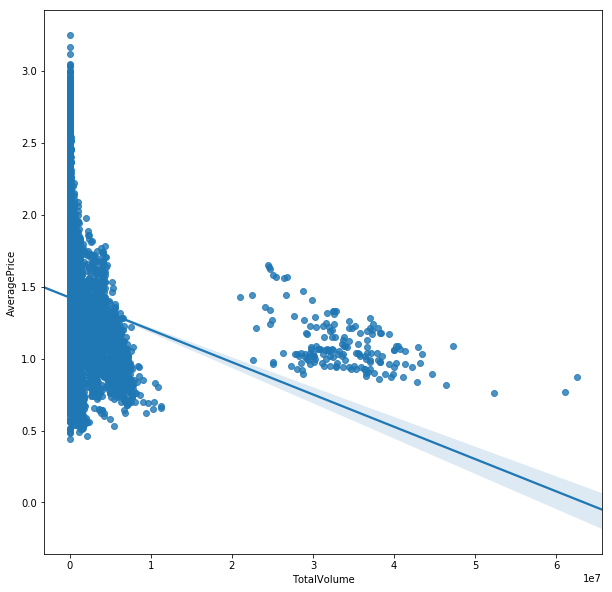

In [82]:
bh                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

#### Woah!! I thought the average price determined how much avocado would be sold. 

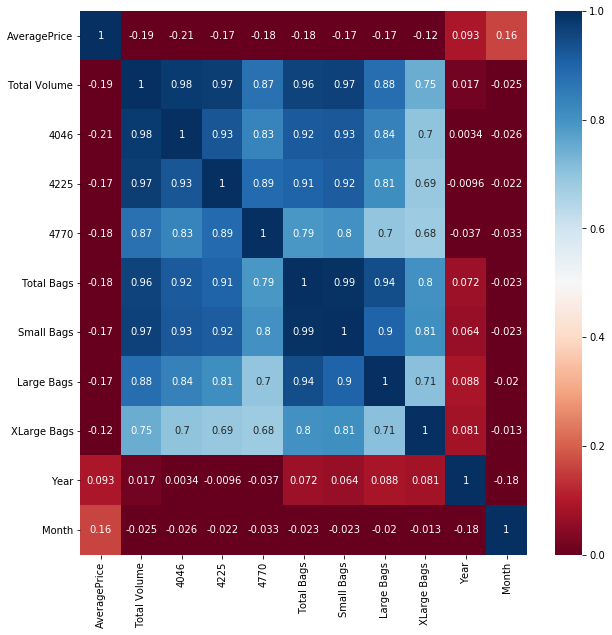

In [6]:
avocado_corr_data = avocados_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(avocado_corr_data,annot=True, cmap="RdBu", vmin=0.0, vmax=1.0)

### Q2: How has the popularity of avocados (conventional & organic) changed over time? *** How many conventional avocados were sold vs organic avocados? 

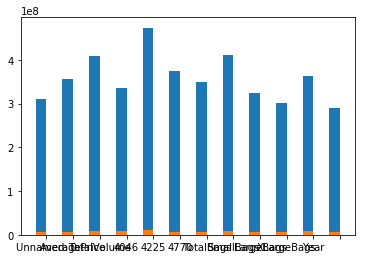

<Figure size 1440x1440 with 0 Axes>

In [81]:
# X = [1,2,3,4,5,6,7,8,9,10,11,12]
# conventional_data = avo_2015[avo_2015["Type"] == "conventional"]
# organic_data = avo_2015[avo_2015["Type"] == "organic"]
# _X = np.arange(len(X))

# conventional_months = conventional_data.groupby(["Month"]).sum()
# organic_months = organic_data.groupby(["Month"]).sum()

# plt.bar(_X - 0.2, conventional_months['TotalVolume'], 0.4)
# plt.bar(_X - 0.2, organic_months['TotalVolume'], 0.4)
# plt.xticks(_X, conventional_months)
# plt.figure(figsize=(20,20))
# plt.show()

# conventional = (avocados_df['Region'].isin(['SanFrancisco']) & (avocados_df['Type']=='conventional'))
# tech_world = sns.factorplot('Month', 'AveragePrice', data=avocados_df[sf], hue='Year',row='Region',aspect=2, palette='Greens')

In [78]:
# plt.figure(figsize=(10,10))

# conventional_avocados = avocados_df[(avocados_df['Type']=='conventional')]
# organic_avocados = avocados_df[(avocados_df['Type']=='organic')]
# # total_avocados_sold = avocados_df['Total Volume'].sum()
# avo_2018 = avocados_df[avocados_df['Year']==2018]
# avo_2017 = avocados_df[avocados_df['Year']==2017]
# avo_2016 = avocados_df[avocados_df['Year']==2016]
# avo_2015 = avocados_df[avocados_df['Year']==2015]
# display('2018',avo_2018['TotalVolume'].sum())
# display('2017',avo_2017['TotalVolume'].sum())

# bplot = sns.barplot(x='Month', y='TotalVolume', hue='Type', data=avo_2015, ci=None)
# bplot.set(xlabel='Month - Jan-Dec(1-12)', ylabel='Total Volume (Avocados Sold)')
# bplot.set_title('Total volume of avocados sold in 2015')
# sns.lineplot(x='Date', y='Total Volume', hue='Type', data=avo_2016, ci=None)
# sns.lineplot(x='Date', y='Total Volume', hue='Type', data=avo_2017, ci=None)
# sns.lineplot(x='Date', y='Total Volume', hue='Type', data=avo_2018, ci=None)
# rplot=sns.relplot(x='Date', y='Total Volume', hue='Type', kind='line', data=avo_2018, ci=None)
# # rplot.set_axis_labels(x_var='Month (1-12)',y_var='Total Volume (Avocados sold)')
# # rplot.set(ylim=(0, total_avocados_sold))
# rplot.

### Q3: In which cities is it relatively expensive to buy organic avocados?

/Users/uchenna/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/uchenna/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


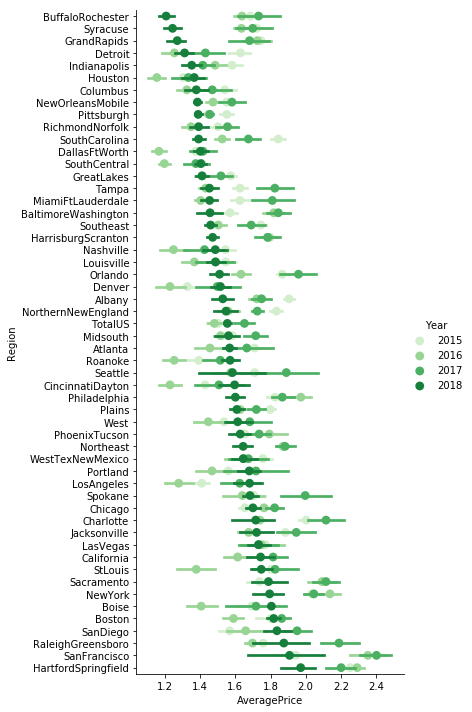

In [10]:
organic_avocados = avocados_df[avocados_df['Type']=='organic']
order = (
    avocados_df[(avocados_df['Year']==2018) & (avocados_df['Type']=='organic')]
    .groupby('Region')['AveragePrice']
    .mean()
    .sort_values()
    .index
)
sns.factorplot(x='AveragePrice',y='Region', data=organic_avocados, hue='Year',size=10,aspect=0.6,palette='Greens',join=False,order=order)


### Note: Regions like HartfordSpringField and San Francisco have the most expensive organic avacodos, while Buffalo, Rochester and Syracuse (cities in New York) has the cheapest organic avocados.

### Top 5 cities where organic avocados are really expensive in 2018


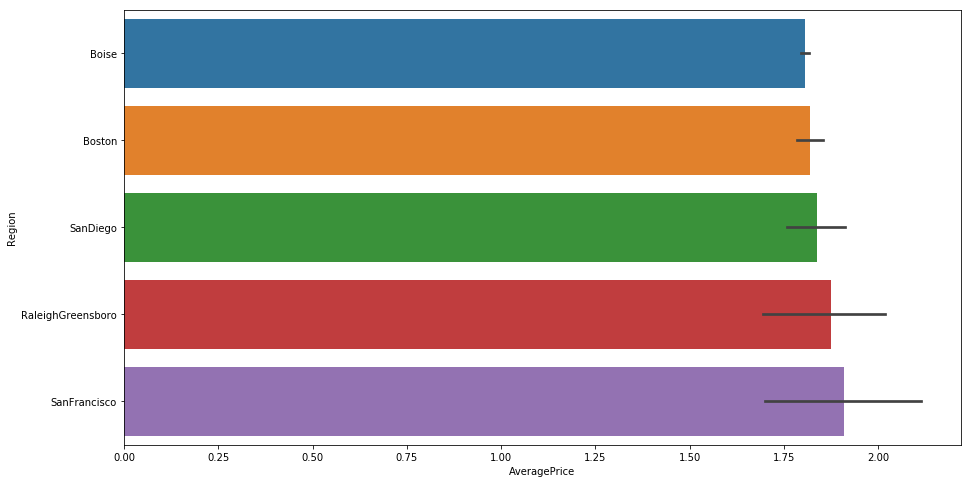

In [73]:
order = (
    avocados_df[(avocados_df['Year']==2018) & (avocados_df['Type']=='organic')]
    .groupby('Region')['AveragePrice']
    .mean()
    .sort_values()
    .index
)

expensive_avo_city = avocados_df[(avocados_df['Type']=='organic') & (avocados_df['Year']==2018)].sort_values(by='AveragePrice', ascending=True)
plt.figure(figsize=(15,8))
# ax=sns.factorplot(x='AveragePrice',y='Region', data=expensive_avo_city, hue='Year',size=10,aspect=0.6,palette='Greens',join=False, order=order[-6:-1])
sns.barplot(x = expensive_avo_city['AveragePrice'], y=expensive_avo_city['Region'], order=order[-6:-1])


### Top 5 cities where organic avocados are inexpensive in 2018

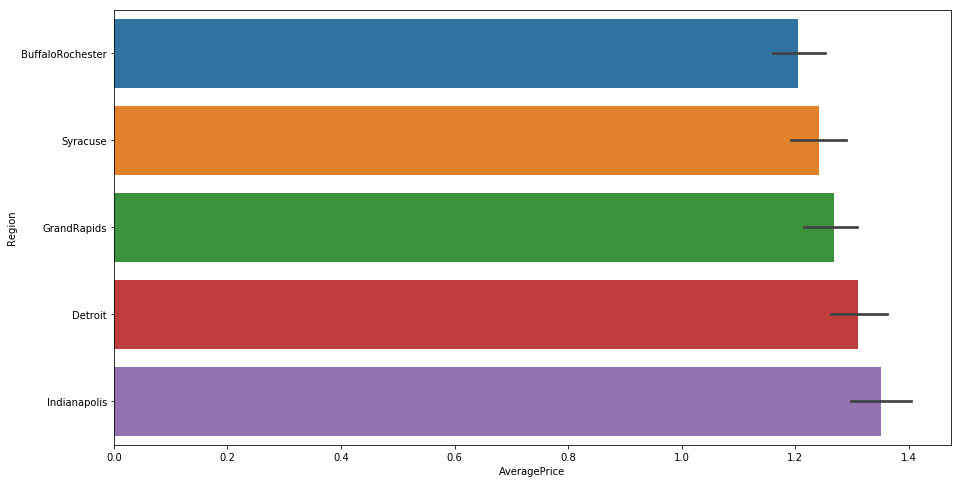

In [74]:
order = (
    avocados_df[(avocados_df['Year']==2018) & (avocados_df['Type']=='organic')]
    .groupby('Region')['AveragePrice']
    .mean()
    .sort_values()
    .index
)
expensive_avo_city = avocados_df[(avocados_df['Type']=='organic') & (avocados_df['Year']==2018)].sort_values(by='AveragePrice', ascending=True)
plt.figure(figsize=(15,8))
# sns.factorplot(x='AveragePrice',y='Region', data=expensive_avo_city, hue='Year',size=8,aspect=0.8,palette='Greens',join=False, order=order[0:5])
sns.barplot(x = expensive_avo_city['AveragePrice'], y=expensive_avo_city['Region'], order=order[0:5])

### Q4: How have conventional avocado prices changed in the past few years? 

* ####  Let's take a look at San Francisco, Nashville, and Houston 

/Users/uchenna/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/uchenna/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/uchenna/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip

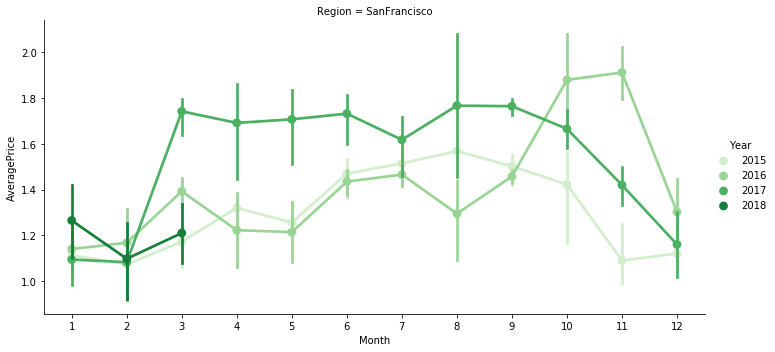

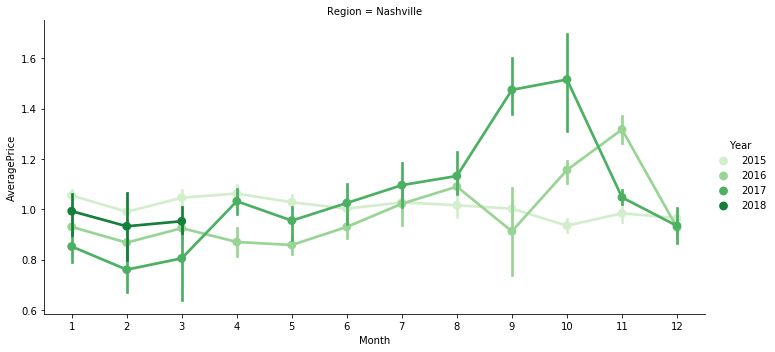

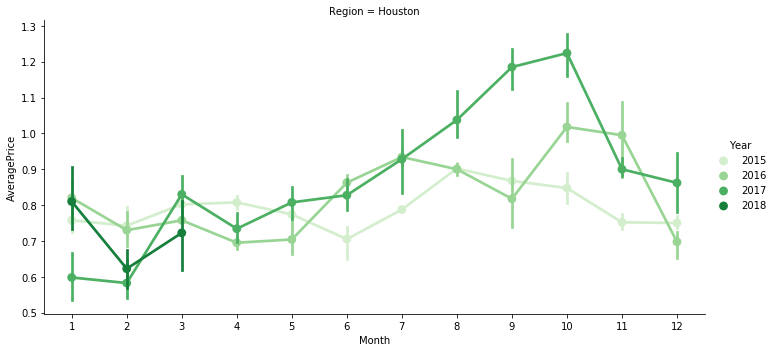

In [55]:
# regions = SanFrancisco
sf = (avocados_df['Region'].isin(['SanFrancisco']) & (avocados_df['Type']=='conventional'))
tech_world = sns.factorplot('Month', 'AveragePrice', data=avocados_df[sf], hue='Year',row='Region',aspect=2, palette='Greens')

# Nashville, Tennessee 
n = (avocados_df['Region'].isin(['Nashville']) & (avocados_df['Type']=='conventional'))
music_city = sns.factorplot('Month', 'AveragePrice', data=avocados_df[n], hue='Year',row='Region',aspect=2, palette='Greens')


# Houston, Texas 
h = (avocados_df['Region'].isin(['Houston']) & (avocados_df['Type']=='conventional'))
cow_boys = sns.factorplot('Month', 'AveragePrice', data=avocados_df[h], hue='Year',row='Region',aspect=2, palette='Greens')



# Findings: 
- Between May and June, prices start to increase 
- Prices peak around between September and October 

   - San Francisco (\$1.60)
   - Nasvhille (\$1.50)
   - Houston (\$1.20)
* Average price completely drops after October 

## Conclusion:
* #### Average prices change based on the month and city in which conventional and organic avocados are sold in.  
* #### Total volume of avocados sold doesn't correspond with the average price. 
* #### Buying avocado toast in San Francisco is too $$$. Make your toast at home. 

### ![Avocadoes](../../Downloads/avocadotoast.jpg)

<center><span style='font-size:200%;  font-weight: bold'>Any Questions?</span></center>

### ![Avocadoes](../../Downloads/avocadodancing.gif)